 **Mileage Prediction - regression analysis**

Objective:

In this Kernel,I'm going to train a multiple regression model to predict the miles per gallon (mpg) of a given car using the scikit learn module in python.The scikit learn module in python is basically used to perform machine learning tasks.It contains a number of machine learning models and algorithms that are very good and helpful to use.Among these models are the regression models that are used to perform both simple and multiple linear regression.

Data Source: 

This dataset was taken from the StarLib library which is maintained at Camegie Mellon University. The dataset used in the 1983 American Statistical Association Exposition.

In [12]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
#Import Dataset
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [14]:
#Gives number of unique values
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [15]:
#Describe Data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [16]:
#Data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [17]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [18]:
#Remove missing values
df=df.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [20]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [21]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

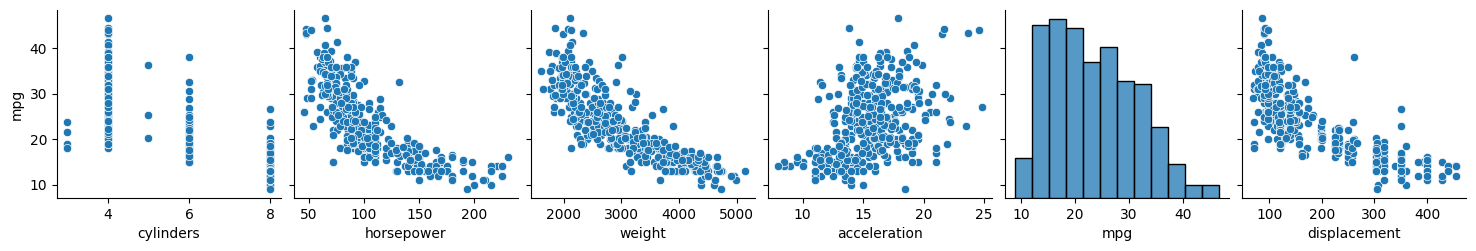

In [26]:
#Data Visualization
sns.pairplot(df,x_vars=['cylinders','horsepower', 'weight','acceleration','mpg','displacement'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

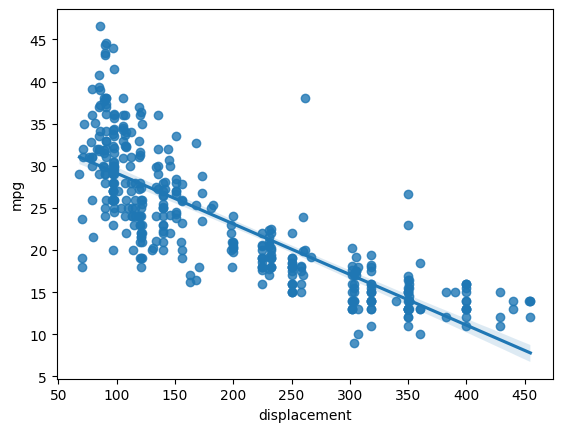

In [24]:
sns.regplot(x='displacement',y='mpg',data=df)

In [25]:
#define target variable y and Feature variable x
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [27]:
y=df['mpg']
x=df[['displacement', 'horsepower', 'weight','acceleration']]

In [28]:
x.shape

(392, 4)

In [29]:
y.shape

(392,)

In [30]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [31]:
#Train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((313, 4), (79, 4), (313,), (79,))

In [33]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()


In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [38]:
reg.intercept_

43.25240581479663

In [39]:
reg.coef_

array([-0.00829547, -0.03934189, -0.00496729,  0.03071883])

Therefore

mileage=43.25 -0.008displacement -0.039horsepower -0.004weight -0.03acceleration +error

In [40]:
#Model Prediction
y_pred=reg.predict(x_test)
y_pred

array([26.43818148, 29.20461913, 28.24879918, 24.07231773, 30.44951379,
       29.35537645, 29.42099238, 14.11217965, 27.98535299, 28.67930145,
       21.16605   , 29.2511641 , 17.00651943, 30.64805673, 26.77689368,
       18.42967488, 27.45466706, 29.74681795,  9.47993666, 23.41048697,
       28.61302077, 19.29630961, 18.1672523 , 13.3223032 , 10.64813863,
       15.19297649, 30.17439242, 19.85988496, 22.37373354, 27.37708584,
       18.4102348 , 25.41883132, 12.30296452, 23.29086569, 20.71143503,
       14.67664181, 19.4309121 , 20.2356865 , 30.56166988, 28.8507552 ,
       11.35050052, 11.63644771, 23.63012428, 23.47506173, 24.00067932,
       18.84023407,  9.64145144, 30.5773605 , 21.86555864,  7.9616831 ,
       16.94267832, 22.74311622, 25.66347891, 27.78420741, 31.38026065,
       23.64074799, 24.74997839, 25.89037409, 26.16811608, 31.69967222,
       23.28077369, 27.2181284 , 30.77561645, 20.52918787, 23.00364948,
       22.35933971, 23.22456868, 16.45604573, 30.58886602,  8.73

In [43]:
reg.score(x_test,y_test)

0.7175570314881667

In [45]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

In [46]:
mae

3.26334591165931

In [47]:
mape

0.13694257943760882

In [48]:
mse

19.57958921306032

**mean_absolute_percentage_error=13%**


**Explaination**

From the model we have prepared we observed that our mean absolute percentage error is around 13%, thus our model accuracy rate becomes (100-13)%=87%.